In [1]:
# This is the demo for Dataset Twitter - DE_target 

In [2]:
# Read Data
import pandas as pd
import numpy as np
from sklearn import preprocessing
# Return a numpy array
def read_data(path=''):
    df = pd.read_csv(path,index_col='new_id')
    df = df[['days','views']]
    df = df.sort_values(by=['new_id'])
    df = df[['days','views']]
    
    # print(df)
    np_array = df.to_numpy(dtype=float)
    np_array = preprocessing.MinMaxScaler().fit_transform(np_array)
    return np_array

In [3]:
np_array = read_data('../../../TwitterDataset/DE/DE_target.csv')
np_array
np.amin(np_array)
# np.amax(np_array)
len(np_array)

9498

In [4]:
# Calculate similarity metrix
import sys
sys.path.append('../')
from knn_metrics.similarity_metric import Euclidean_similarity_metric

distance_metric = Euclidean_similarity_metric(np_array)
print(distance_metric)

[[0.         0.0451135  0.02618622 ... 0.20145191 0.2138969  0.07570651]
 [0.0451135  0.         0.01892765 ... 0.15633928 0.2590096  0.03059484]
 [0.02618622 0.01892765 0.         ... 0.17526575 0.240083   0.04952039]
 ...
 [0.20145191 0.15633928 0.17526575 ... 0.         0.41534875 0.1257454 ]
 [0.2138969  0.2590096  0.240083   ... 0.41534875 0.         0.28960339]
 [0.07570651 0.03059484 0.04952039 ... 0.1257454  0.28960339 0.        ]]


In [5]:
np.amin(distance_metric)


0.0

In [6]:
# Get similarity Metric:  similarity = 1/1+distance
similarity_metric = np.zeros((len(distance_metric),len(distance_metric)))
for i in range(0,len(distance_metric)):
    for j in range(0,len(distance_metric)):
        similarity_metric[i][j] = 1/(1+distance_metric[i][j])
        
similarity_metric

array([[1.        , 0.95683387, 0.974482  , ..., 0.83232628, 0.82379319,
        0.9296216 ],
       [0.95683387, 1.        , 0.98142395, ..., 0.86479809, 0.79427512,
        0.97031342],
       [0.974482  , 0.98142395, 1.        , ..., 0.85087139, 0.80639763,
        0.95281617],
       ...,
       [0.83232628, 0.86479809, 0.85087139, ..., 1.        , 0.70653964,
        0.88830032],
       [0.82379319, 0.79427512, 0.80639763, ..., 0.70653964, 1.        ,
        0.77543221],
       [0.9296216 , 0.97031342, 0.95281617, ..., 0.88830032, 0.77543221,
        1.        ]])

In [7]:
print(np.amax(similarity_metric))
print(np.amin(similarity_metric))

1.0
0.47108316910411113


In [8]:
from knn_metrics import knn_metric
knn_result = knn_metric.Knn_metric(similarity_metric,k=50)
knn_result

array([[8324, 3459, 6262, ..., 8370, 5796, 9335],
       [ 196, 6077, 5123, ..., 6814, 1941, 2006],
       [6036, 2011, 9188, ..., 2788, 2769, 2532],
       ...,
       [4542, 3747, 7149, ..., 9282, 3492, 8326],
       [2578,   46, 5989, ..., 4985, 6691, 3860],
       [3630, 1928, 6465, ..., 3689, 3097, 2371]])

In [9]:
knn_result.shape

(9498, 50)

In [10]:
from snn_computation import snn_metric
snn_distance_metric = snn_metric.create_snn_distance(knn_result)
snn_similarity_metric = snn_metric.create_snnMetric(knn_result)


In [11]:
print(snn_distance_metric)
print(snn_similarity_metric)

[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
df_snn = pd.DataFrame(snn_distance_metric)
# df_snn.to_csv('./snn_distance_metric_ds3.csv',header=False,sep=' ',index=False)


In [27]:
df_snn = pd.DataFrame(snn_similarity_metric)
# df_snn.to_csv('../snn_computation/snn_metric_ds3.csv',header=False,sep=' ',index=False)

In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from os import path
from run_snndensity import read_dataset,read_snnArray,dbscan
import sys
sys.path.append('../../')
from Evaluation.silhouette_coefficient import silhoutte_result
#DB SCAN
snn_nparray = snn_distance_metric.copy()
def demo(input_minpts,input_eps):
    data_labeled = dbscan(MinPts=input_minpts,Eps=input_eps,snn_nparray=snn_nparray)
    labels = data_labeled.labels_
    # print(labels)

# Remove outliers
    count = 0
    for item in labels:
        if item>-1:
            count = count+1
    # print("Number of true node ", count)  # Number of node after remove outliers

    new_distance_metric = np.zeros((count,count),dtype=float)
    label_dictionary_before = {}
    
    start = 0 
    for item in labels:
        label_dictionary_before[start]=item 
        start = start+1
    # print(label_dictionary_before)
    dictionary_no_outliers = {i:label_dictionary_before[i] for i in label_dictionary_before if label_dictionary_before[i]!=-1}
    # print(dictionary_no_outliers)

    k = dictionary_no_outliers.keys()

    # Create a new name for each node after remove outliers
    change_name_list={}
    start = 0
    for item in k:
        change_name_list[start] = item
        start = start+1

    #Add value to new snn_array, to use for calculate  Silhoutte - after remove outliers
    i=0
    j=0
    for i in range(0,count):
        for j in range(i+1,count):
            new_distance_metric[i][j] = snn_nparray[change_name_list[i]][change_name_list[j]]
            new_distance_metric[j][i] = new_distance_metric[i][j]

    # Silhoutte 
    new_label = list(dictionary_no_outliers.values())
    number_of_cluster = len(set(new_label)) 
    if len(set(new_label)) > 1:
        silhoute_removeouliers= silhoutte_result(new_distance_metric,new_label)
    else:
        print("Number of labels needs to > 1. ERROR!!")
        silhoute_removeouliers = -1

    return silhoute_removeouliers,len(new_label),number_of_cluster,label_dictionary_before

In [29]:
list_minpts = [i for i in range (2,20)]
eps = 0.5
for item in list_minpts:
    score,number_of_nodes,num_clusters,label_dictionary = demo(item,eps)


# snn_nparray

Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!
Number of labels needs to > 1. ERROR!!


In [40]:
score,number_of_nodes,num_clusters,label_dictionary = demo(3,0.5)
print(score,number_of_nodes,num_clusters)
from collections import defaultdict
df = pd.read_csv('../../../TwitterDataset/DE/DE_target.csv')
df = df[['new_id','days','views']]
v = defaultdict(list)

for key, value in sorted(label_dictionary.items()):
    v[value].append(key)
for key in v.keys():
    if (key!=-1):
        print("Cluster: ",key)
        nodes = v[key]
        for n in nodes:
            print(df.loc[df['new_id'].isin nodes])

0.6339130434782608 23 7
Cluster:  0
      new_id  days  views
7658     571  2012   7886
      new_id  days  views
1933    4733  2012   7193
     new_id  days  views
133    4854  2012   5380
      new_id  days  views
6111    8904  2012   6123
Cluster:  1
      new_id  days  views
7153     663   756   1939
      new_id  days  views
7271    5985   756    523
      new_id  days  views
2183    7728   756   1262
Cluster:  6
     new_id  days  views
772     869  1143  61961
      new_id  days  views
4154    1542  1143  74187
      new_id  days  views
6006    8607  1143  67667
Cluster:  2
      new_id  days  views
9127    1481   744   1541
      new_id  days  views
1029    1670   744   2734
      new_id  days  views
2711    1715   744   2630
     new_id  days  views
409    8365   744   3035
Cluster:  3
      new_id  days  views
9040    3091   676    820
      new_id  days  views
3934    4397   676    383
      new_id  days  views
1787    4767   676    810
Cluster:  4
      new_id  days  views


,days,views
new_id,,
0,1449,629
1,1275,26242
2,1348,6518
3,1338,1133
4,1437,2574
...,...,...
9493,1673,23053
9494,1179,2280
9495,672,4025


In [16]:
list_eps=np.arange(0.05, 1, 0.05).tolist()
for item in list_eps:
    score,number_of_nodes,num_clusters,label_dictionary = demo(2,item)
    print(score, num_clusters,number_of_nodes)


0.976 5 10
0.9520000000000003 10 20
0.9249203777731023 15 30
0.881139981765902 25 50
0.8506268383642116 34 68
0.8155266372423285 46 92
0.7779518580300804 55 115
0.7401085533006359 73 151
0.7113775496893628 85 177
0.6840517569036277 95 199
0.64724003338873 114 238
0.5837094291874803 140 299
0.5508002994924766 162 345
0.484636583005609 211 453
0.44881629928652683 239 518
0.34792644531758776 349 776
0.22526728663672282 613 1437
0.06385603716084443 1327 5286
0.0015203117541109567 87 8930


In [17]:
df = pd.read_csv('../../../TwitterDataset/DE/DE_target.csv',index_col='new_id')
df = df[['days','views']]
df = df.sort_values(by=['new_id'])
df = df[['days','views']]
np_array = df.to_numpy(dtype=float)
np_array = preprocessing.MinMaxScaler().fit_transform(np_array)
df1 = pd.DataFrame(np_array,columns=['days','views'])
df1

,days,views
0,0.350791,6.205502e-06
1,0.305678,2.613283e-04
2,0.324605,6.486393e-05
3,0.322012,1.122568e-05
4,0.347680,2.557902e-05
...,...,...
9493,0.408867,2.295637e-04
9494,0.280788,2.265058e-05
9495,0.149339,4.003196e-05
9496,0.564688,1.981378e-04


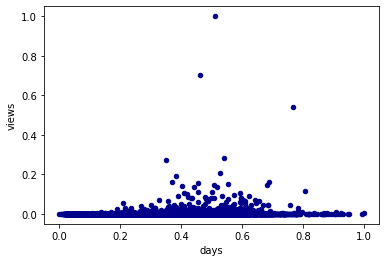

In [18]:
import matplotlib.pyplot as plt
ax1 = df1.plot.scatter(x='days',
                      y='views',
                      c='DarkBlue')

In [19]:
X = DBSCAN(eps=0.0015,min_samples=5,metric="euclidean").fit(np_array)
X.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
len(set(X.labels_))

17